In [25]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
X, y = make_regression(n_samples=100, n_features=2,n_informative=2, n_targets=1, noise=50)

In [27]:
df = pd.DataFrame({'feature1': X[:,0], 'feature2': X[:,1], 'target':y})

In [28]:
df.head()

,feature1,feature2,target
0,-0.634502,-0.390799,16.432814
1,0.022412,0.939356,18.428651
2,1.039164,0.129308,110.364820
3,-1.635997,-0.761134,-102.360602
4,-1.232595,0.146853,-23.375156


Text(0.5, 0, 'target')

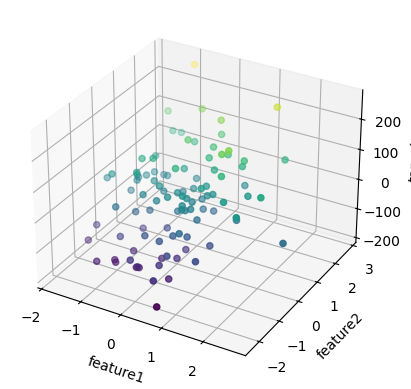

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(
    xs=df['feature1'],
    ys=df['feature2'],
    zs=df['target'],
    c=df['target'],
    cmap='viridis'
)
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('target')

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = lr.predict(X_test)

In [37]:
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('R2 Score', r2_score(y_test, y_pred))

MAE 36.03427570778627
MSE 2324.3398663298312
R2 Score 0.7980408586998109


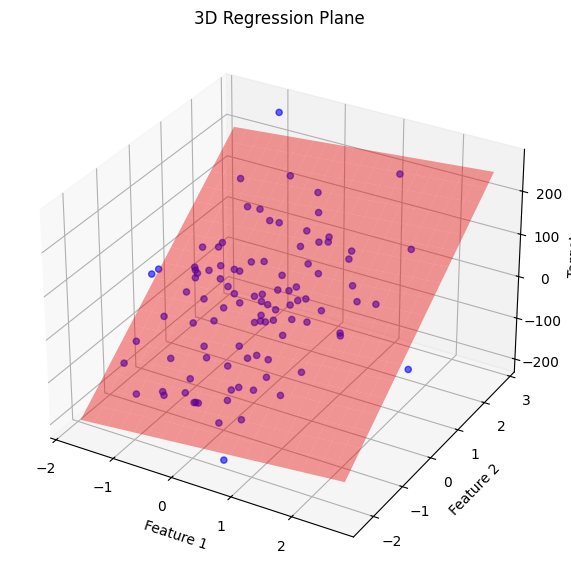

In [39]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Original data points
ax.scatter(df['feature1'], df['feature2'], df['target'], color='blue', alpha=0.6, label='Actual')

# Create grid for plane
x_surf, y_surf = np.meshgrid(
    np.linspace(df['feature1'].min(), df['feature1'].max(), 20),
    np.linspace(df['feature2'].min(), df['feature2'].max(), 20)
)
z_pred = lr.intercept_ + lr.coef_[0]*x_surf + lr.coef_[1]*y_surf

# Plot regression plane
ax.plot_surface(x_surf, y_surf, z_pred, color='red', alpha=0.4, label='Predicted Surface')

# Labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Regression Plane')

plt.show()
